In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('data/Train_KQyJ5eh.csv')

In [4]:
data.shape

(587, 2)

In [5]:
data.head()

,Date,Number_SKU_Sold
0,1-Jan-07,31762
1,2-Jan-07,285955
2,3-Jan-07,740781
3,4-Jan-07,508796
4,5-Jan-07,445951


In [7]:
data.describe()

,Number_SKU_Sold
count,5.870000e+02
mean,4.118112e+06
std,1.015100e+07
min,3.176200e+04
25%,1.075948e+06
50%,2.784444e+06
75%,5.208588e+06
max,1.925327e+08


In [8]:
data.tail()

,Date,Number_SKU_Sold
582,20-Dec-08,10572461
583,21-Dec-08,11507413
584,22-Dec-08,13640882
585,23-Dec-08,8821786
586,24-Dec-08,192532706


In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')


In [12]:
data.head()

,Date,Number_SKU_Sold
Date,,
2007-01-01,2007-01-01,31762
2007-01-02,2007-01-02,285955
2007-01-03,2007-01-03,740781
2007-01-04,2007-01-04,508796
2007-01-05,2007-01-05,445951


In [11]:
data.index = data['Date']

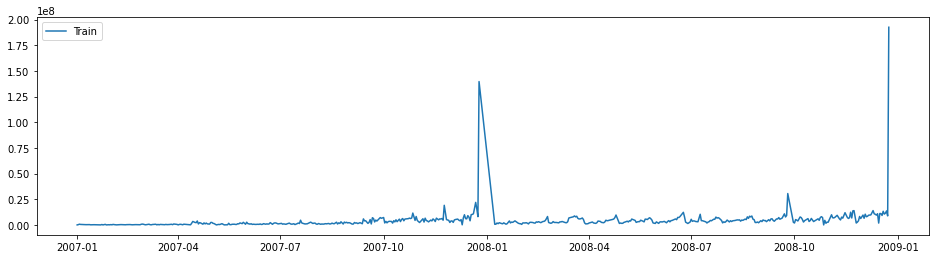

In [15]:
plt.figure(figsize=(16,4))
plt.plot(data.index,data['Number_SKU_Sold'],label='Train')
plt.legend(loc='best')
plt.show()

In [16]:
data['Number_SKU_Sold'].describe()

count    5.870000e+02
mean     4.118112e+06
std      1.015100e+07
min      3.176200e+04
25%      1.075948e+06
50%      2.784444e+06
75%      5.208588e+06
max      1.925327e+08
Name: Number_SKU_Sold, dtype: float64

In [17]:
print("99th percentile: ",(np.percentile(data['Number_SKU_Sold'],99)))
print("97th percentile: ",(np.percentile(data['Number_SKU_Sold'],97)))
print("95th percentile: ",(np.percentile(data['Number_SKU_Sold'],95)))

99th percentile:  14225472.619999975
97th percentile:  10975127.499999993
95th percentile:  9855528.099999992


<AxesSubplot:xlabel='Number_SKU_Sold'>

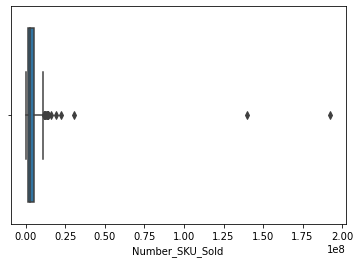

In [18]:
sns.boxplot(data['Number_SKU_Sold'])

In [20]:
IQR=(np.percentile(data['Number_SKU_Sold'],75))-(np.percentile(data['Number_SKU_Sold'],25))
whisker_Val=(np.percentile(data['Number_SKU_Sold'],75))+(1.5*IQR)

In [22]:
data.loc[data['Number_SKU_Sold']>whisker_Val]

,Date,Number_SKU_Sold
Date,,
2007-10-27,2007-10-27,11572492
2007-11-24,2007-11-24,19138073
2007-12-22,2007-12-22,21956074
2007-12-23,2007-12-23,15766750
2007-12-25,2007-12-25,139629635
2008-06-24,2008-06-24,12288917
2008-09-25,2008-09-25,30579435
2008-11-15,2008-11-15,11930320
2008-11-20,2008-11-20,12416871


In [23]:
data_original=data['Number_SKU_Sold']
data['Number_SKU_Sold']=data['Number_SKU_Sold'].apply(lambda x:np.nan if x>whisker_Val else x)

In [24]:
data['Number_SKU_Sold'].isnull().sum()

16

In [25]:
data['Number_SKU_Sold']=data['Number_SKU_Sold'].fillna(method='ffill')

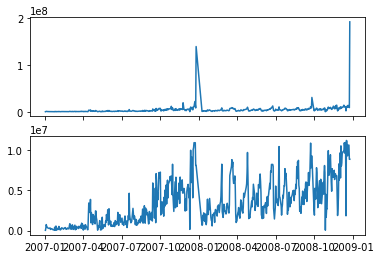

In [26]:
fig,axs=plt.subplots(2,1,sharex=True)
axs[0].plot(data_original,)
axs[1].plot(data['Number_SKU_Sold'])
plt.show()

In [28]:
data['Date'].max()-data['Date'].min() #data['Number_SKU_Sold']

Timedelta('723 days 00:00:00')

In [29]:
pd.date_range(start='2007-01-01',end='2008-12-24').difference(data.index)

DatetimeIndex(['2007-01-07', '2007-01-08', '2007-01-10', '2007-01-14',
               '2007-01-17', '2007-01-21', '2007-01-25', '2007-01-28',
               '2007-02-04', '2007-02-10',
               ...
               '2008-11-01', '2008-11-02', '2008-11-07', '2008-11-09',
               '2008-11-14', '2008-11-16', '2008-11-24', '2008-11-30',
               '2008-12-07', '2008-12-09'],
              dtype='datetime64[ns]', length=137, freq=None)

In [31]:
start_date = '2007-01-01'
end_date = '2008-12-24'

In [32]:
missing_dates = pd.DataFrame(data = pd.date_range(start = start_date, end = end_date).difference(data.index), 
                             columns= ['Date'])

In [34]:
missing_dates['Day']=missing_dates['Date'].dt.strftime("%A")
missing_dates['Month']=missing_dates['Date'].dt.month
missing_dates['Year']=missing_dates['Date'].dt.year

In [37]:
missing_dates['Day'].value_counts()

Sunday       86
Saturday     14
Monday       10
Friday       10
Wednesday     6
Thursday      6
Tuesday       5
Name: Day, dtype: int64

In [38]:
pd.crosstab(missing_dates['Year'],missing_dates['Day'])

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2007,3,4,6,43,5,1,5
2008,7,6,8,43,1,4,1


In [39]:
data_=pd.DataFrame(data['Number_SKU_Sold'])

In [40]:
data_.index=pd.DatetimeIndex(data.Date)

In [44]:
idx=pd.date_range('2007-01-01','2008-12-24')
data_=data_.reindex(idx,fill_value=0)

In [45]:
# extract weekday from the dates
data_['Date'] = data_.index
data_['weekday_name'] = data_['Date'].dt.strftime("%A")
data_.shape

(724, 3)

In [46]:
# remove sundays from data
data_ = data_.loc[data_['weekday_name']!= 'Sunday']
data_.shape

(621, 3)

In [47]:
data_original = data['Number_SKU_Sold']
data_['Number_SKU_Sold'] = data_['Number_SKU_Sold'].apply(lambda x: np.nan if x == 0.0 else x)
data_.isnull().sum()

Number_SKU_Sold    51
Date                0
weekday_name        0
dtype: int64

In [48]:
data_['Number_SKU_Sold'] = data_['Number_SKU_Sold'].fillna(method ='ffill')

In [73]:
data_new=data_.drop(['Date','weekday_name'],axis=1)

In [75]:
data_new

,Number_SKU_Sold
2007-01-01,31762.0
2007-01-02,285955.0
2007-01-03,740781.0
2007-01-04,508796.0
2007-01-05,445951.0
...,...
2008-12-19,9254530.0
2008-12-20,10572461.0
2008-12-22,10572461.0
2008-12-23,8821786.0


In [76]:
#feature extraction
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_series=seasonal_decompose(data_['Number_SKU_Sold'],period=6)

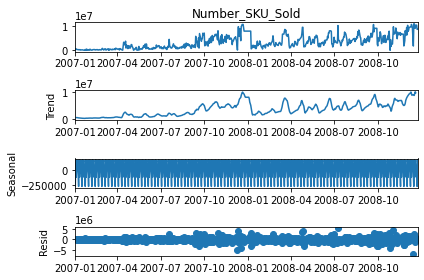

In [52]:
decomposed_series.plot()
plt.show()

<AxesSubplot:>

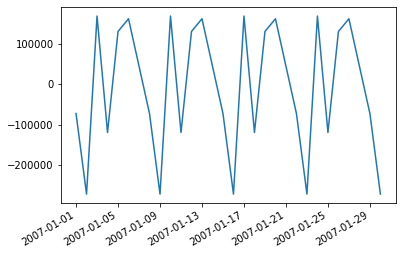

In [55]:
decomposed_series.seasonal[:26].plot()

In [56]:
data_feat=pd.DataFrame({
    "year": data_['Date'].dt.year,
                          "month": data_['Date'].dt.month,
                          "day": data_['Date'].dt.day,
                          "weekday": data_['Date'].dt.dayofweek,
                          "weekday_name":data_['Date'].dt.strftime("%A"),
                          "dayofyear": data_['Date'].dt.dayofyear,
                          "week": data_['Date'].dt.week,
                          "quarter": data_['Date'].dt.quarter,    
})

In [57]:
complete_data = pd.concat([data_feat, data_['Number_SKU_Sold']], axis=1)
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Number_SKU_Sold
2007-01-01,2007,1,1,0,Monday,1,1,1,31762.0
2007-01-02,2007,1,2,1,Tuesday,2,1,1,285955.0
2007-01-03,2007,1,3,2,Wednesday,3,1,1,740781.0
2007-01-04,2007,1,4,3,Thursday,4,1,1,508796.0
2007-01-05,2007,1,5,4,Friday,5,1,1,445951.0


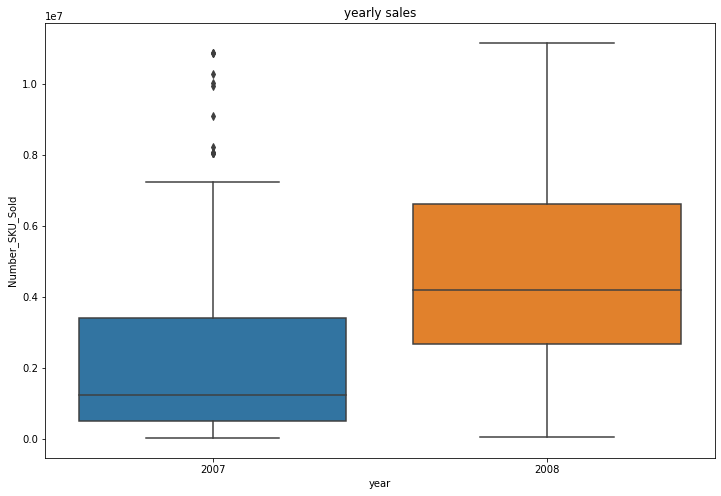

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x=complete_data['year'],y=complete_data.Number_SKU_Sold)
plt.title('yearly sales')
plt.show()

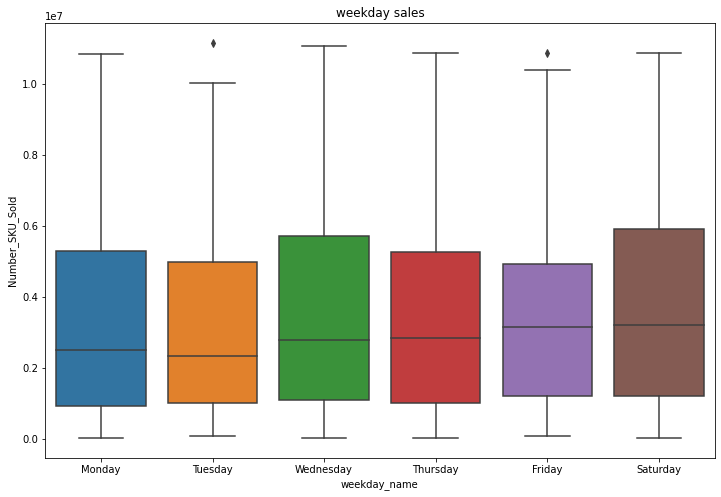

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x=complete_data['weekday_name'],y=complete_data.Number_SKU_Sold)
plt.title('weekday sales')
plt.show()

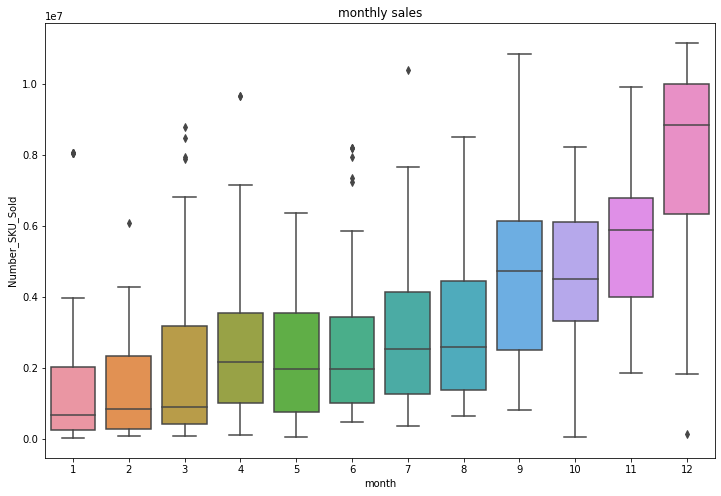

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x=complete_data['month'],y=complete_data.Number_SKU_Sold)
plt.title('monthly sales')
plt.show()

In [63]:
data_.head()

,Number_SKU_Sold,Date,weekday_name
2007-01-01,31762.0,2007-01-01,Monday
2007-01-02,285955.0,2007-01-02,Tuesday
2007-01-03,740781.0,2007-01-03,Wednesday
2007-01-04,508796.0,2007-01-04,Thursday
2007-01-05,445951.0,2007-01-05,Friday


In [65]:
train_data=data_[:469]
valid_data=data_[469:]

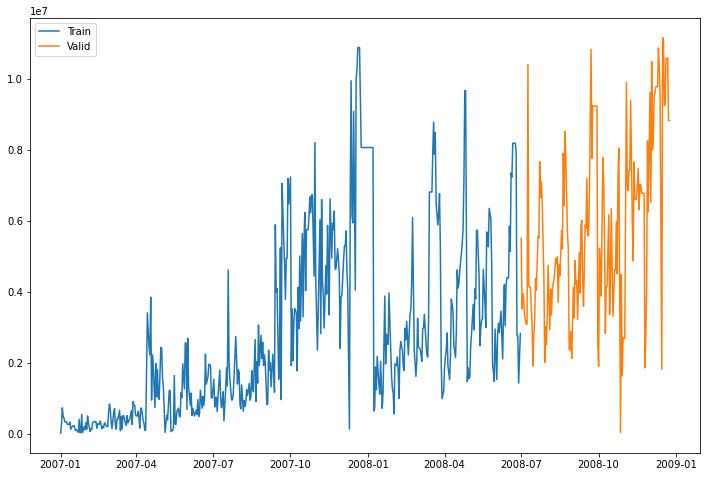

In [66]:
plt.figure(figsize=(12,8))
plt.plot(train_data.index,train_data.Number_SKU_Sold,label='Train')
plt.plot(valid_data.index,valid_data.Number_SKU_Sold,label='Valid')
plt.legend(loc='best')
plt.show()

In [67]:
def rmsle(actual, preds):
    for i in range(0,len(preds)):
        if preds[i]<0:
            preds[i] = 0
        else:
            pass
    
    error = (sqrt(mean_squared_log_error(actual, preds)))*100
    return error

# Building TimeSeries Forecasting Models

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing

In [82]:
model=ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']),seasonal_periods=6,trend='add',seasonal='add')
model=model.fit(smoothing_level=0.2,smoothing_slope=0.001,smoothing_seasonal=0.2)

preds=model.forecast(len(valid_data))
score=rmsle(valid_data['Number_SKU_Sold'],preds)

print('rmsle score is: ',score)

rmsle score is:  59.24307662565839


In [84]:
from itertools import product
from tqdm import tqdm_notebook

In [85]:
# setting initial values and some bounds for them
level = [0.1, 0.3, 0.5, 0.8]
smoothing_slope = [0.0001, 0.001, 0.05] 
smoothing_seasonal = [0.2, 0.4, 0.6]

# creating list with all the possible combinations of parameters
parameters = product(level, smoothing_slope, smoothing_seasonal)
parameters_list = list(parameters)
len(parameters_list)

36

In [87]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        #training the model
        model = ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']), seasonal_periods=6, trend='add', seasonal='add')
        model = model.fit(smoothing_level=param[0], smoothing_slope=param[1], smoothing_seasonal=param[2])

        # predictions and evaluation
        preds = model.forecast(len(valid_data)) 
        score = rmsle(valid_data['Number_SKU_Sold'], preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'RMSLE']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='RMSLE', ascending=True).reset_index(drop=True)
    
    return result_table

In [88]:
result_table = grid_search(parameters_list)

  0%|          | 0/36 [00:00<?, ?it/s]

In [89]:
result_table

,parameters,RMSLE
0,"(0.1, 0.001, 0.2)",58.276097
1,"(0.1, 0.0001, 0.2)",58.282484
2,"(0.1, 0.0001, 0.4)",60.916507
3,"(0.1, 0.001, 0.4)",60.936168
4,"(0.1, 0.05, 0.4)",61.243131
5,"(0.1, 0.05, 0.2)",62.588756
6,"(0.3, 0.001, 0.2)",66.326035
7,"(0.1, 0.001, 0.6)",66.849780
8,"(0.1, 0.0001, 0.6)",66.865801
9,"(0.3, 0.0001, 0.2)",67.099067


In [92]:
#training the model
model = ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']), seasonal_periods=6, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.1, smoothing_slope=0.0001, smoothing_seasonal=0.2)
    
# predictions and evaluation
preds = model.forecast(len(valid_data)) 
score = rmsle(valid_data['Number_SKU_Sold'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 58.28248425065201


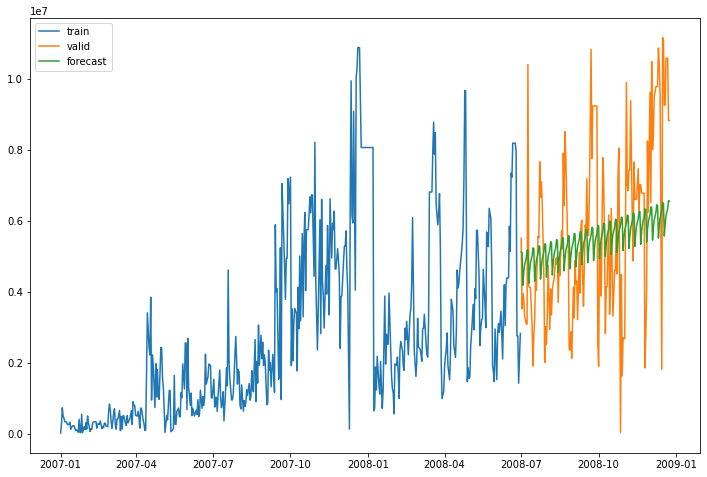

In [93]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index , train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index , valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index , preds, label = 'forecast')
plt.legend(loc='best')

plt.show()